# Modulation Classification

Developing AutoML Model for AWGN Channel for Modulation Classification. SNR Ratio's(in dB) of Channel are $[−15,−10,−5,0,5,10,15,20,25,30]$.

**Data Generation:**
Data is generated using MatLab's Communication Toolbox for Modulation Schemes QPSK, 16-QAM, 64-QAM for SNR Ratio's (in dB) $[−15,−10,−5,0,5,10,15,20,25,30]$ when signal is transmitted through Channels Rician Channels.

**Modulation Classification:**
We will use AutoML to create a Classifier to Predict Labels.

## Imports

### Importing Libraries

We will be using AutoKeras for generating AutoML Models.
Source of Documentation: [https://autokeras.com/](https://autokeras.com/)

### Importing Data

Files are uploaded in Google Drive. Notebook is connected to Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Modulation-Classification/Real\ Datasets/Mathworks-Dataset/AutoML

Mounted at /gdrive
/gdrive/My Drive/Modulation-Classification/Real Datasets/Mathworks-Dataset/AutoML


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sns
import scipy.io
import os
from sklearn.model_selection import train_test_split

# Importing Preprocessing Libraries
from Import_Functions import ImportData, ImportDatasets
from Plot_Results import EvaluateData, PlotResults

# AutoML Libraries
!pip3 install autokeras
import autokeras as ak

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, ReLU, Conv2D, Input, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Model

     |████████████████████████████████| 174kB 8.2MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=2d3dbe7f712065134aa6cf4d1dbb6fce9113531ce9b303aa1a1a1103764945c4
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=1518d800e8232a6ac34819625bc26ee1a1ab726e20844305870d349f84a4968d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


## Customised AutoML Blocks

ReshapeLayerBlock: Removes Dimension in axis=1

In [3]:
class ReshapeLayerBlock(ak.Block):
    def build(self, hp, inputs=None):
        input_node = inputs[0]
        output_node = tf.squeeze(input_node,axis=1)
        return output_node

Callbacks

In [4]:
EarlyStoppingCallbacks = [tf.keras.callbacks.EarlyStopping(patience=3)]

## Importing Data

In [5]:
X_Train, y_Train, X_Valid, y_Valid = ImportDatasets('Rician')

## AutoML CNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [6]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
conv_node = ak.ConvBlock()(input_node)
dense_node = ak.DenseBlock()(conv_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=5)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 5 Complete [00h 00m 37s]
val_loss: 1.1009342670440674

Best val_loss So Far: 1.0991432666778564
Total elapsed time: 00h 03m 56s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
15/15 [==============================] - 11s 670ms/step - loss: 1.1081 - accuracy: 0.3038
Epoch 2/10
15/15 [==============================] - 8s 527ms/step - loss: 1.0978 - accuracy: 0.3684
Epoch 3/10
15/15 [==============================] - 8s 522ms/step - loss: 1.0984 - accuracy: 0.3684
Epoch 4/10
15/15 [==============================] - 8s 520ms/step - loss: 1.0986 - accuracy: 0.3604
Epoch 5/10
15/15 [==============================] - 8s 521ms/step - loss: 1.0987 - accuracy: 0.2930
Epoch 6/10
15/15 [==============================] - 8s 519ms/step - loss: 1.0988 - accuracy: 0.2918
Epoch 7/10
15/15 [==============================] - 8s 519ms/step - loss: 1.0989 - accuracy: 0.2918
Epoch 8/10
15/15 [==============================] - 8s 518ms/step - loss: 1.0990 - accuracy: 0.2918
Epoch 9/10
15/15 [=========

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 32)       608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1024, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 512, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 512, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 512, 32)        9248  

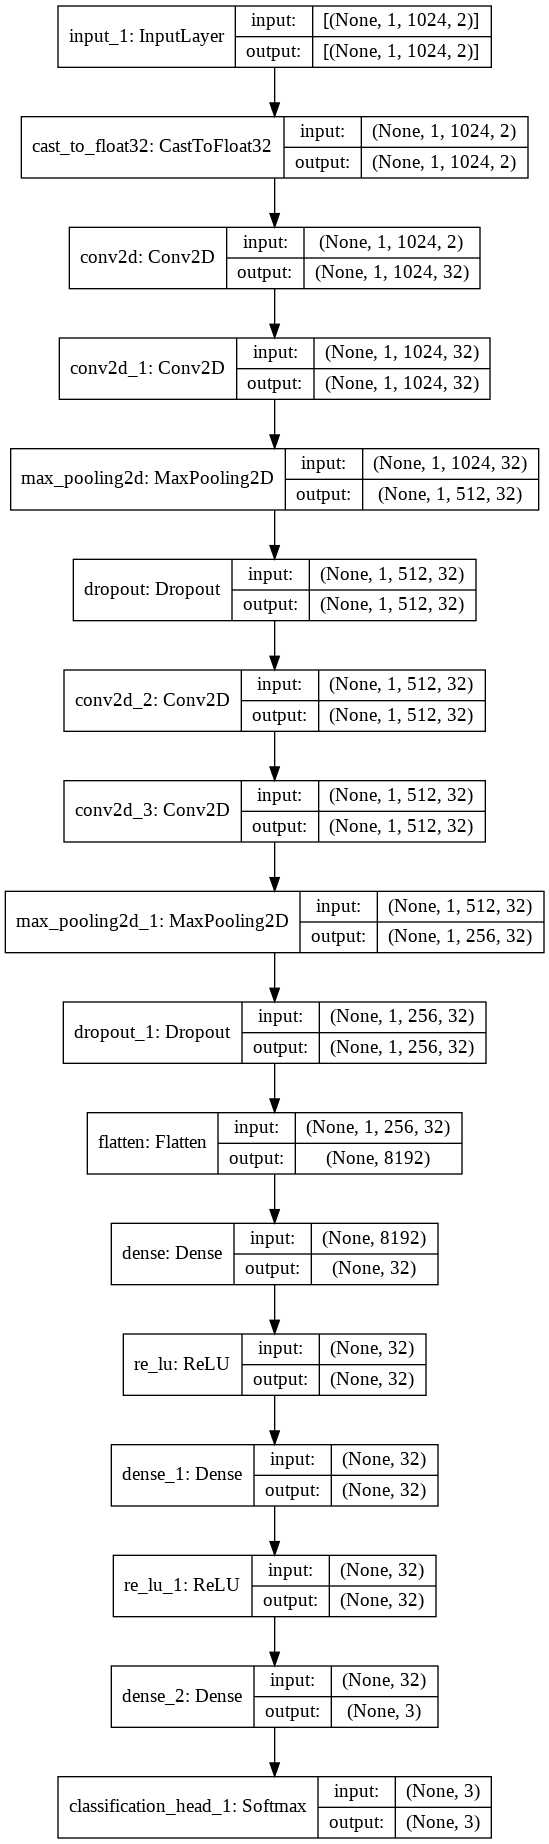

In [7]:
Rician_Model = RicianClassifier.export_model()
tf.keras.backend.clear_session()
Rician_Model.summary()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_CNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [8]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 9s 582ms/step - loss: 1.0986 - accuracy: 0.3319 - val_loss: 1.0986 - val_accuracy: 0.3702
Epoch 2/75
14/14 [==============================] - 5s 333ms/step - loss: 1.0986 - accuracy: 0.3351 - val_loss: 1.0985 - val_accuracy: 0.3600
Epoch 3/75
14/14 [==============================] - 5s 334ms/step - loss: 1.0986 - accuracy: 0.3374 - val_loss: 1.0985 - val_accuracy: 0.3325
Epoch 4/75
14/14 [==============================] - 5s 335ms/step - loss: 1.0984 - accuracy: 0.3380 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 5/75
14/14 [==============================] - 5s 332ms/step - loss: 1.0983 - accuracy: 0.3386 - val_loss: 1.0984 - val_accuracy: 0.3340
Epoch 6/75
14/14 [==============================] - 5s 331ms/step - loss: 1.0980 - accuracy: 0.3398 - val_loss: 1.0984 - val_accuracy: 0.3408
Epoch 7/75
14/14 [==============================] - 5s 330ms/step - loss: 1.0972 - accuracy: 0.3500 - val_loss: 1.0992 - val_accuracy: 0.3502
Epoch 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.34833332896232605
SNR: -10 Accuracy: 0.33000001311302185
SNR: -5 Accuracy: 0.3383333384990692
SNR: 0 Accuracy: 0.36666667461395264
SNR: 5 Accuracy: 0.47333332896232605
SNR: 10 Accuracy: 0.5733333230018616
SNR: 15 Accuracy: 0.6383333206176758
SNR: 20 Accuracy: 0.7083333134651184
SNR: 25 Accuracy: 0.6833333373069763
SNR: 30 Accuracy: 0.699999988079071


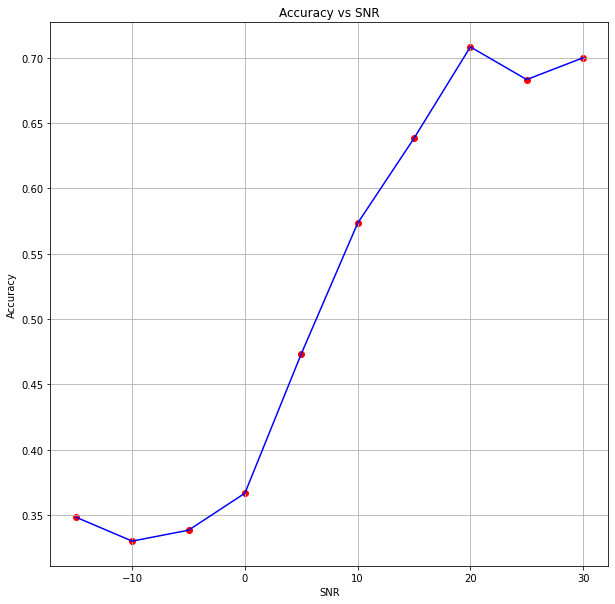

In [9]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_CNN.jpg")

Save Model

In [10]:
Rician_Model.save("../Models/Rician_CNN.h5")

## AutoML RNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [11]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
reshape_node = ReshapeLayerBlock()(input_node)
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(reshape_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=5)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 5 Complete [00h 01m 11s]
val_loss: 1.1138288974761963

Best val_loss So Far: 1.1009269952774048
Total elapsed time: 00h 03m 19s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
15/15 [==============================] - 8s 329ms/step - loss: 1.1059 - accuracy: 0.3199
Epoch 2/10
15/15 [==============================] - 5s 327ms/step - loss: 1.1058 - accuracy: 0.3201
Epoch 3/10
15/15 [==============================] - 5s 326ms/step - loss: 1.1058 - accuracy: 0.3203
Epoch 4/10
15/15 [==============================] - 5s 329ms/step - loss: 1.1057 - accuracy: 0.3204
Epoch 5/10
15/15 [==============================] - 5s 332ms/step - loss: 1.1057 - accuracy: 0.3205
Epoch 6/10
15/15 [==============================] - 5s 329ms/step - loss: 1.1056 - accuracy: 0.3207
Epoch 7/10
15/15 [==============================] - 5s 328ms/step - loss: 1.1056 - accuracy: 0.3204
Epoch 8/10
15/15 [==============================] - 5s 322ms/step - loss: 1.1055 - accuracy: 0.3200
Epoch 9/10
15/15 [==========

INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
tf.compat.v1.squeeze (TFOpLa (None, 1024, 2)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 1024, 4)           80        
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                131104    
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0     

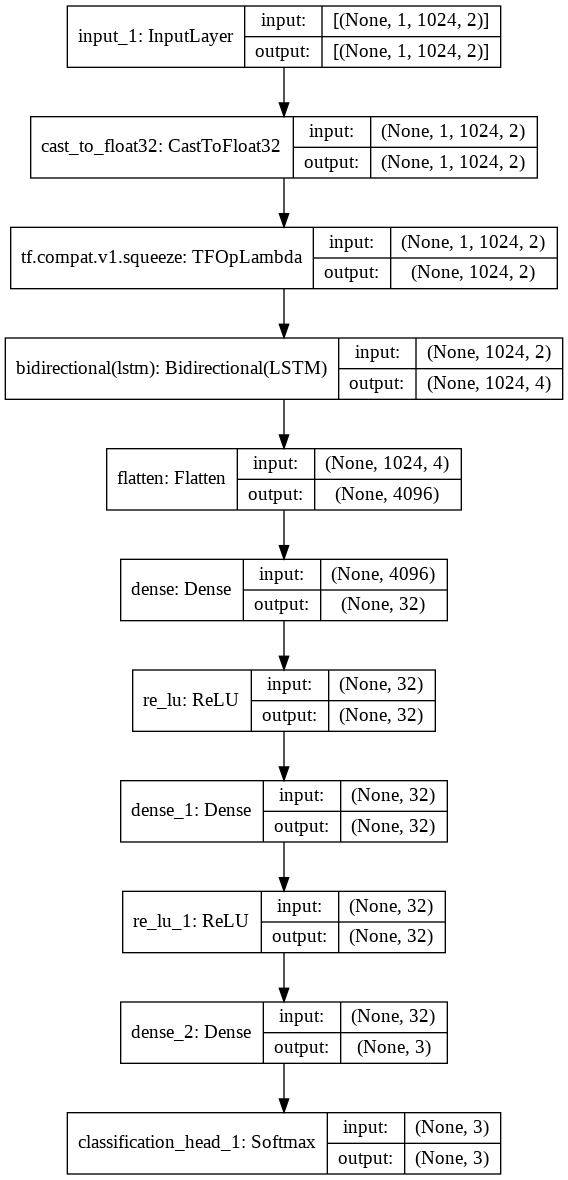

In [12]:
Rician_Model = RicianClassifier.export_model()
Rician_Model.summary()
tf.keras.backend.clear_session()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_RNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [13]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 5s 201ms/step - loss: 1.1039 - accuracy: 0.3327 - val_loss: 1.1092 - val_accuracy: 0.3293
Epoch 2/75
14/14 [==============================] - 2s 146ms/step - loss: 1.1039 - accuracy: 0.3327 - val_loss: 1.1091 - val_accuracy: 0.3290
Epoch 3/75
14/14 [==============================] - 2s 145ms/step - loss: 1.1038 - accuracy: 0.3324 - val_loss: 1.1090 - val_accuracy: 0.3288
Epoch 4/75
14/14 [==============================] - 2s 146ms/step - loss: 1.1038 - accuracy: 0.3323 - val_loss: 1.1090 - val_accuracy: 0.3293
Epoch 5/75
14/14 [==============================] - 2s 146ms/step - loss: 1.1038 - accuracy: 0.3323 - val_loss: 1.1089 - val_accuracy: 0.3297
Epoch 6/75
14/14 [==============================] - 2s 147ms/step - loss: 1.1037 - accuracy: 0.3324 - val_loss: 1.1089 - val_accuracy: 0.3300
Epoch 7/75
14/14 [==============================] - 2s 147ms/step - loss: 1.1037 - accuracy: 0.3324 - val_loss: 1.1088 - val_accuracy: 0.3307
Epoch 

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3466666638851166
SNR: -10 Accuracy: 0.35499998927116394
SNR: -5 Accuracy: 0.3333333432674408
SNR: 0 Accuracy: 0.3449999988079071
SNR: 5 Accuracy: 0.3266666531562805
SNR: 10 Accuracy: 0.30666667222976685
SNR: 15 Accuracy: 0.34333333373069763
SNR: 20 Accuracy: 0.33666667342185974
SNR: 25 Accuracy: 0.3383333384990692
SNR: 30 Accuracy: 0.3466666638851166


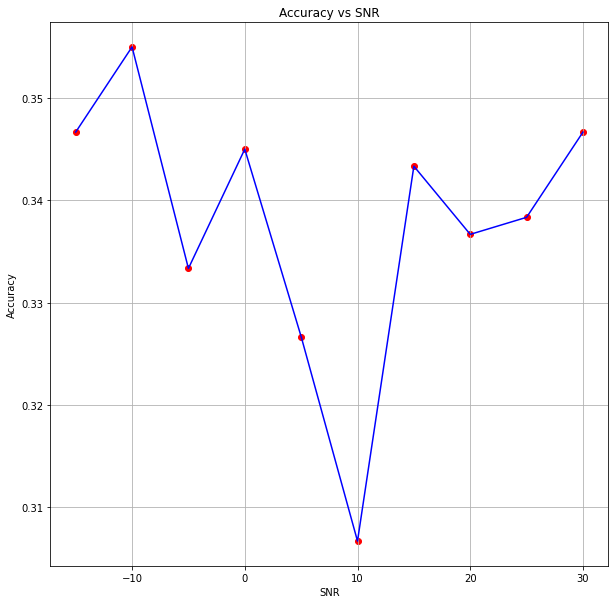

In [14]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_RNN.jpg")

Save Model

In [15]:
Rician_Model.save("../Models/Rician_RNN.h5")

## AutoML CLDNN Model for Rician Channel

For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [16]:
tf.keras.backend.clear_session()

input_node = ak.ImageInput()
conv_node = ak.ConvBlock()(input_node)
reshape_node = ReshapeLayerBlock()(conv_node)
rnn_node = ak.RNNBlock(return_sequences=True,
                       bidirectional=True,
                       layer_type='lstm')(reshape_node)
dense_node = ak.DenseBlock()(rnn_node)
output_node = ak.ClassificationHead(num_classes=3,
                                    loss='categorical_crossentropy')(dense_node)

RicianClassifier = ak.AutoModel(inputs=input_node,
                                outputs=output_node,
                                overwrite=True,
                                tuner='greedy',
                                max_trials=1)

RicianClassifier.fit(X_Train, y_Train, epochs=10, batch_size=4096, validation_split=0.3,shuffle=True,callbacks=EarlyStoppingCallbacks)

Trial 1 Complete [00h 01m 03s]
val_loss: 1.1002440452575684

Best val_loss So Far: 1.1002440452575684
Total elapsed time: 00h 01m 03s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
15/15 [==============================] - 18s 875ms/step - loss: 1.1005 - accuracy: 0.1801
Epoch 2/10
15/15 [==============================] - 11s 736ms/step - loss: 1.1007 - accuracy: 0.2918
Epoch 3/10
15/15 [==============================] - 11s 747ms/step - loss: 1.1005 - accuracy: 0.2918
Epoch 4/10
15/15 [==============================] - 11s 742ms/step - loss: 1.1002 - accuracy: 0.2918
Epoch 5/10
15/15 [==============================] - 11s 734ms/step - loss: 1.1003 - accuracy: 0.2918
Epoch 6/10
15/15 [==============================] - 11s 731ms/step - loss: 1.1004 - accuracy: 0.2918
Epoch 7/10
15/15 [==============================] - 11s 730ms/step - loss: 1.1005 - accuracy: 0.2918
Epoch 8/10
15/15 [==============================] - 11s 738ms/step - loss: 1.1005 - accuracy: 0.2918
Epoch 9/10
15/15 [==============================] - 11s 740ms/step - loss: 1.1005 - accuracy: 0.2918
Epoch 10/10
15/15 [==============================] - 11s 738ms/step - loss: 1.1005 - accura

INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 1, 1024, 2)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 32)       1632      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1024, 32)       25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 256, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 256, 32)        25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 256, 32)        25632 

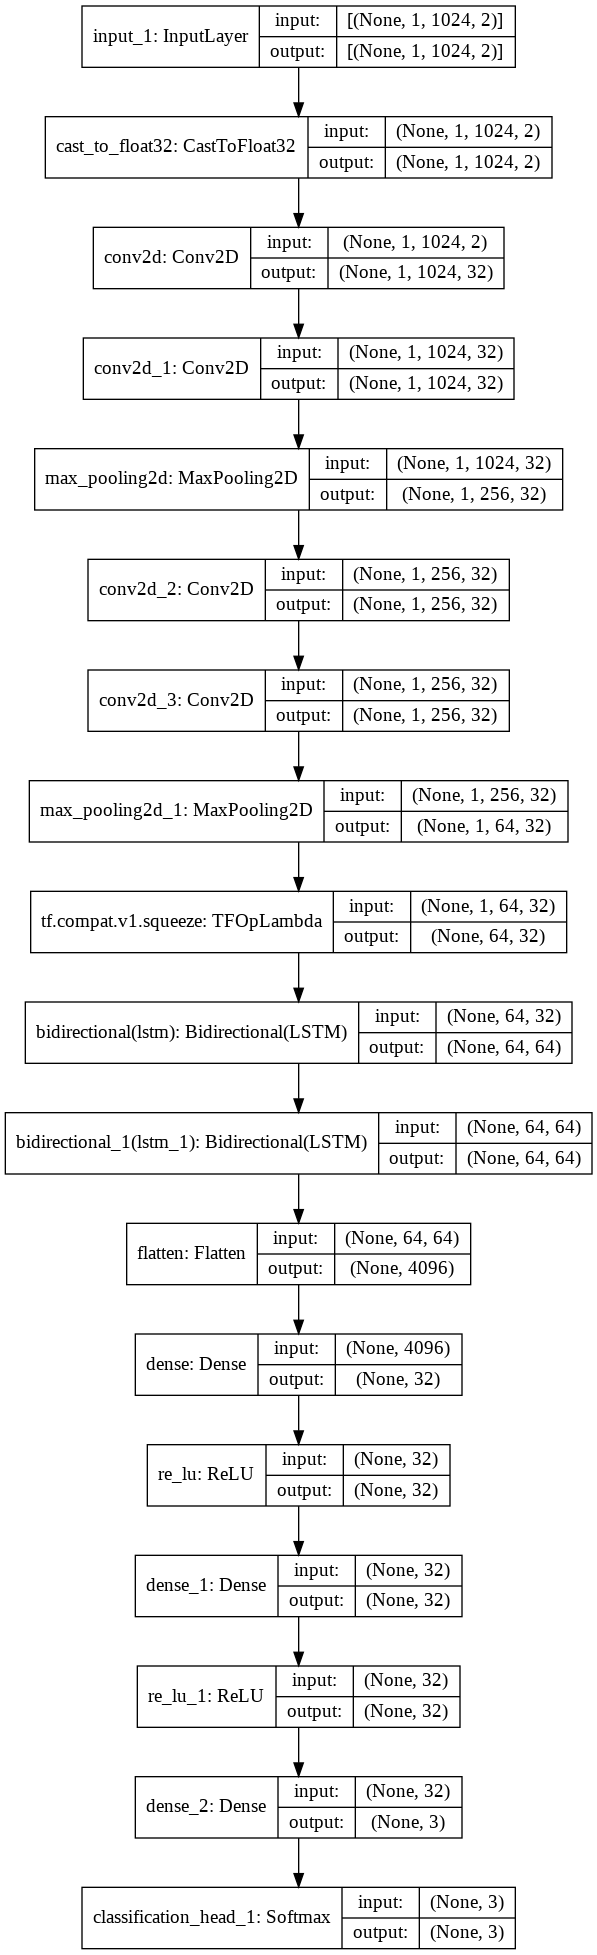

In [17]:
Rician_Model = RicianClassifier.export_model()
Rician_Model.summary()
tf.keras.backend.clear_session()
tf.keras.utils.plot_model(Rician_Model, to_file='../Models/Rician_Model_CLDNN.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [18]:
Rician_Model.fit(X_Train, y_Train, epochs=75, batch_size=4096, validation_split=0.1,shuffle=True)

Epoch 1/75
14/14 [==============================] - 17s 878ms/step - loss: 1.0987 - accuracy: 0.3303 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/75
14/14 [==============================] - 8s 544ms/step - loss: 1.0986 - accuracy: 0.3343 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/75
14/14 [==============================] - 8s 550ms/step - loss: 1.0987 - accuracy: 0.3300 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 4/75
14/14 [==============================] - 8s 554ms/step - loss: 1.0984 - accuracy: 0.3320 - val_loss: 1.0953 - val_accuracy: 0.2797
Epoch 5/75
14/14 [==============================] - 8s 554ms/step - loss: 1.0806 - accuracy: 0.3929 - val_loss: 0.8499 - val_accuracy: 0.6268
Epoch 6/75
14/14 [==============================] - 8s 547ms/step - loss: 0.9909 - accuracy: 0.4590 - val_loss: 0.6870 - val_accuracy: 0.6253
Epoch 7/75
14/14 [==============================] - 8s 544ms/step - loss: 0.9411 - accuracy: 0.4773 - val_loss: 0.6358 - val_accuracy: 0.6697
Epoch

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3199999928474426
SNR: -10 Accuracy: 0.3100000023841858
SNR: -5 Accuracy: 0.31833332777023315
SNR: 0 Accuracy: 0.3799999952316284
SNR: 5 Accuracy: 0.503333330154419
SNR: 10 Accuracy: 0.6299999952316284
SNR: 15 Accuracy: 0.6966666579246521
SNR: 20 Accuracy: 0.7516666650772095
SNR: 25 Accuracy: 0.7833333611488342
SNR: 30 Accuracy: 0.8033333420753479


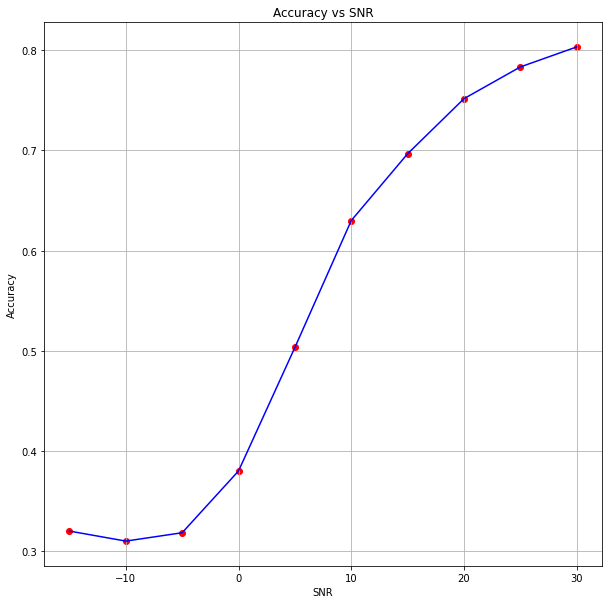

In [19]:
EvaluateData(Rician_Model, X_Valid, y_Valid, "../Results/Rician_Accuracy_CLDNN.jpg")

Save Model

In [20]:
Rician_Model.save("../Models/Rician_CLDNN.h5")

## CNN Model for Rician Channel
For Rician Channel, Input Dimensions is (1,1024,2)

### Creating Classifier

In [21]:
tf.keras.backend.clear_session()

Inp = Input(shape=(1,1024,2))

x = Conv2D(filters=16, kernel_size=(1,8),padding='same')(Inp)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=24, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=32, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=48, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=64, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=(1,2),strides=(1,2))(x)

x = Conv2D(filters=96, kernel_size=(1,8),padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = AveragePooling2D(pool_size=(1,32))(x)

x = Flatten()(x)
Out = Dense(3,activation='softmax')(x)

CNNModel = Model(Inp,Out)

Model Summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1024, 2)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1024, 16)       272       
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1024, 16)       64        
_________________________________________________________________
re_lu (ReLU)                 (None, 1, 1024, 16)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 512, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 512, 24)        3096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 512, 24)        96    

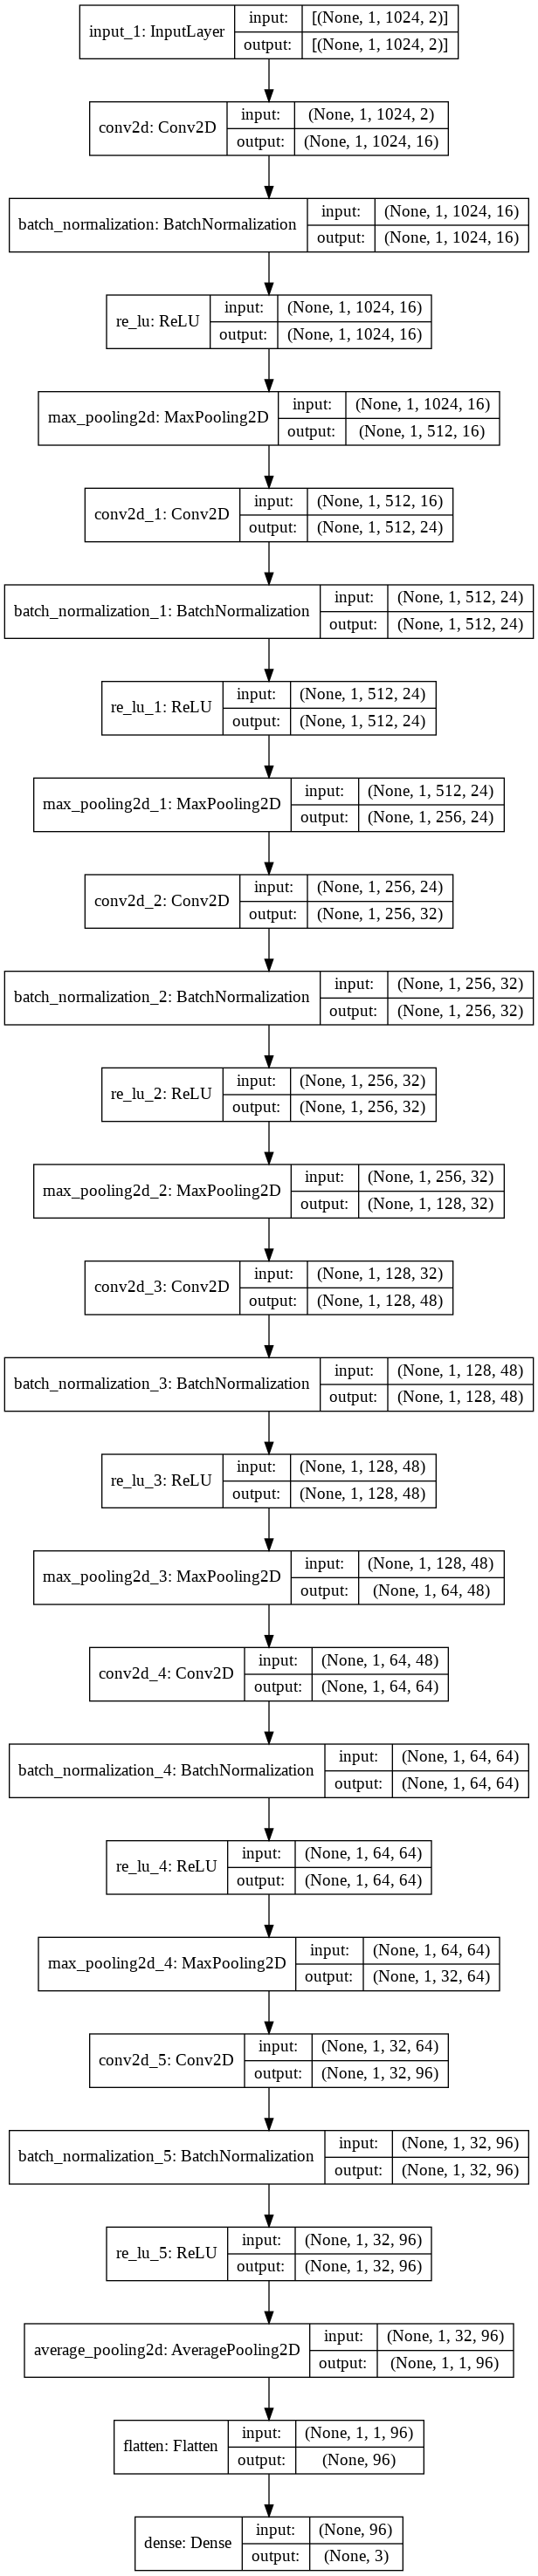

In [22]:
CNNModel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),loss='categorical_crossentropy', metrics=['accuracy'])
CNNModel.summary()
tf.keras.utils.plot_model(CNNModel, to_file='../Models/CNN_Rician_Model.png', show_shapes=True,show_layer_names=True)

### Training and Evaluating Model

Training the Model

In [28]:
CNNModel.fit(X_Train,y_Train,batch_size=256,epochs=50,validation_split=0.1,shuffle=True)

Epoch 1/50
211/211 [==============================] - 3s 16ms/step - loss: 0.8640 - accuracy: 0.5194 - val_loss: 0.6122 - val_accuracy: 0.6903
Epoch 2/50
211/211 [==============================] - 3s 15ms/step - loss: 0.8634 - accuracy: 0.5194 - val_loss: 0.6123 - val_accuracy: 0.6900
Epoch 3/50
211/211 [==============================] - 3s 15ms/step - loss: 0.8624 - accuracy: 0.5218 - val_loss: 0.6119 - val_accuracy: 0.6895
Epoch 4/50
211/211 [==============================] - 3s 15ms/step - loss: 0.8616 - accuracy: 0.5212 - val_loss: 0.6129 - val_accuracy: 0.6903
Epoch 5/50
211/211 [==============================] - 3s 16ms/step - loss: 0.8600 - accuracy: 0.5212 - val_loss: 0.6108 - val_accuracy: 0.6868
Epoch 6/50
211/211 [==============================] - 3s 16ms/step - loss: 0.8590 - accuracy: 0.5249 - val_loss: 0.6066 - val_accuracy: 0.6880
Epoch 7/50
211/211 [==============================] - 3s 16ms/step - loss: 0.8584 - accuracy: 0.5231 - val_loss: 0.6011 - val_accuracy: 0.6892

Evaluate the Model

Evaluating Model
SNR: -15 Accuracy: 0.3083333373069763
SNR: -10 Accuracy: 0.3199999928474426
SNR: -5 Accuracy: 0.3566666543483734
SNR: 0 Accuracy: 0.35499998927116394
SNR: 5 Accuracy: 0.47999998927116394
SNR: 10 Accuracy: 0.6100000143051147
SNR: 15 Accuracy: 0.6466666460037231
SNR: 20 Accuracy: 0.6983333230018616
SNR: 25 Accuracy: 0.6933333277702332
SNR: 30 Accuracy: 0.7099999785423279


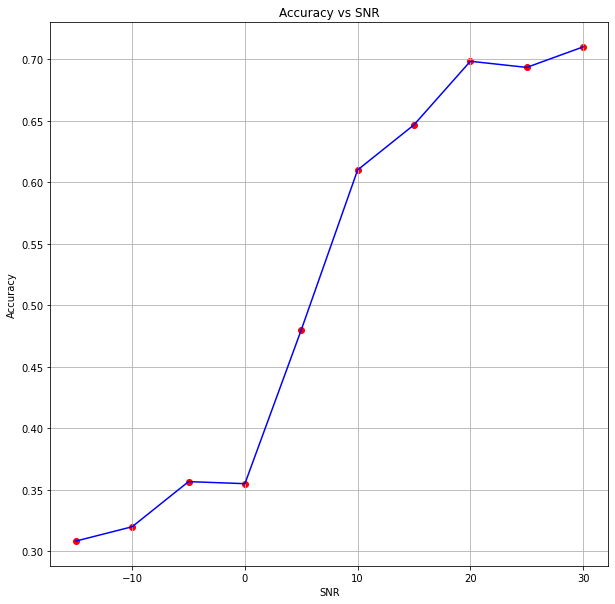

In [29]:
EvaluateData(CNNModel, X_Valid, y_Valid, "../Results/CNN_Rician_Accuracy.jpg")

Save Model

In [30]:
CNNModel.save("../Models/CNN_Rician.h5")

## Plot Results


### Rician Model

Importing Data and Models

In [31]:
Rician_CNN = tf.keras.models.load_model("../Models/Rician_CNN.h5")
Rician_RNN = tf.keras.models.load_model("../Models/Rician_RNN.h5")
Rician_CLDNN = tf.keras.models.load_model("../Models/Rician_CLDNN.h5")
CNN_Rician = tf.keras.models.load_model("../Models/CNN_Rician.h5")

Plotting Results

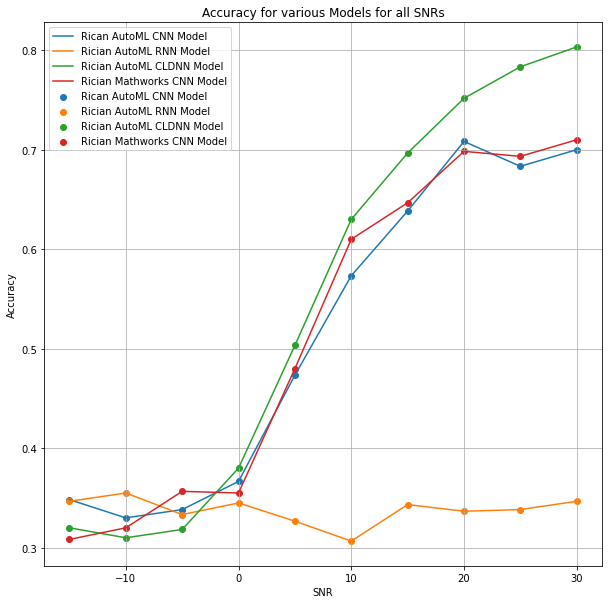

In [32]:
Models = {"Rican AutoML CNN Model":Rician_CNN, "Rician AutoML RNN Model":Rician_RNN, "Rician AutoML CLDNN Model":Rician_CLDNN, "Rician Mathworks CNN Model":CNN_Rician}
PlotResults(Models, X_Valid, y_Valid, "../Results/Rician_Accuracies.jpg")